<a href="https://colab.research.google.com/github/jonathanlexi/deep-learning/blob/main/04_Bonus_Water_Jonathan_Lexi_Febrian_Sitohang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch as torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
#dataset

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5),(0.5)),])

train_data = datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_data = datasets.MNIST(root='./data',train=False,download=True , transform = transform)

#load dataset

train_loader = torch.utils.data.DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=10,shuffle=True)

In [ ]:
for data in train_loader:
  print(data)
  break;

[tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1.,

In [ ]:
x,y = data[0][0],data[1][0]
print(y)

tensor(1)


In [ ]:
data[0][1].shape

torch.Size([1, 28, 28])

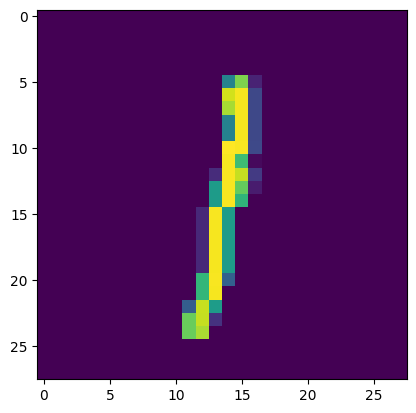

In [ ]:
plt.imshow(data[0][0].view(28,28))
plt.show()

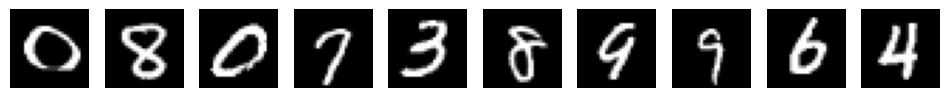

In [ ]:
%matplotlib inline

def plot_images(images) :
  fig,axs = plt.subplots(1,len(images),figsize=(12,6))
  for i,image in enumerate(images):
    axs[i].imshow(image.squeeze().numpy(),cmap='gray')
    axs[i].axis('off')

images, labels = next(iter(train_loader))
plot_images(images[:10])

# Design Neural Network

Activation Function memiliki peran penting dalam pelatihan model deep learning . Untuk mempelajari pola yang kompleks .

Untuk membuat feedforward neural network yang menklasifikasi digit , dengan fungsi aktivasi
- Tanh
- LeakyReLu
- Sigmoid

## Tanh Activation Function

In [ ]:
class Model1(nn.Module) :
  def __init__(self) :
    super(Model1,self).__init__()
    #layers
    self.linear1 = nn.Linear(28*28,64)
    self.linear2 = nn.Linear(64,64)
    self.linear3 = nn.Linear(64,64)
    self.linear4= nn.Linear(64,10)
    self.tanh = nn.Tanh() #call activation function

  def forward(self,img) :
    x = img.view(-1,28*28)
    x = self.tanh(self.linear1(x))
    x = self.tanh(self.linear2(x))
    x = self.tanh(self.linear3(x))
    x = self.linear4(x)
    return x

model1 = Model1()
model1

Model1(
  (linear1): Linear(in_features=784, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=10, bias=True)
  (tanh): Tanh()
)

## LeakyReLu Activation Function

In [ ]:
class Model2(nn.Module) :
  def __init__(self) :
    super(Model2,self).__init__()
    #layers
    self.linear1 = nn.Linear(28*28,64)
    self.linear2 = nn.Linear(64,64)
    self.linear3 = nn.Linear(64,64)
    self.linear4= nn.Linear(64,10)
    self.leakyRelu = nn.LeakyReLU() #call activation function

  def forward(self,img) :
    x = img.view(-1,28*28)
    x = self.leakyRelu(self.linear1(x))
    x = self.leakyRelu(self.linear2(x))
    x = self.leakyRelu(self.linear3(x))
    x = self.linear4(x)
    return x

model2 = Model2()
model2

Model2(
  (linear1): Linear(in_features=784, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=10, bias=True)
  (leakyRelu): LeakyReLU(negative_slope=0.01)
)

## Sigmoid Activation Function

In [ ]:
class Model3(nn.Module) :
  def __init__(self) :
    super(Model3,self).__init__()
    #layers
    self.linear1 = nn.Linear(28*28,64)
    self.linear2 = nn.Linear(64,64)
    self.linear3 = nn.Linear(64,64)
    self.linear4= nn.Linear(64,10)
    self.sigmoid = nn.Sigmoid() #call activation function

  def forward(self,img) :
    x = img.view(-1,28*28)
    x = self.sigmoid(self.linear1(x))
    x = self.sigmoid(self.linear2(x))
    x = self.sigmoid(self.linear3(x))
    x = self.linear4(x)
    return x

model3 = Model3()
model3

Model3(
  (linear1): Linear(in_features=784, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=64, bias=True)
  (linear4): Linear(in_features=64, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
cross_el = nn.CrossEntropyLoss()
learning_rate=0.01
momentum = 0.9
epochs = 5

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms

models = [Model1(), Model2(), Model3()]
accuracies = []

for i, model in enumerate(models):
    print(f"Model {i + 1}")
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    for epoch in range(epochs):
        running_loss = 0
        for j, data in enumerate(train_loader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = cross_el(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if j % 100 == 99:
                print(f"[{epoch + 1}, {j + 1}] loss: {running_loss / 100:.3f}")
                running_loss = 0.0

    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"accuracy: {accuracy}%")
        accuracies.append(accuracy)

print("Accuracies: ", accuracies)

Model 1
[1, 100] loss: 1.648
[1, 200] loss: 0.835
[1, 300] loss: 0.670
[1, 400] loss: 0.726
[1, 500] loss: 0.742
[1, 600] loss: 0.713
[1, 700] loss: 0.631
[1, 800] loss: 0.646
[1, 900] loss: 0.627
[1, 1000] loss: 0.598
[1, 1100] loss: 0.579
[1, 1200] loss: 0.743
[1, 1300] loss: 0.743
[1, 1400] loss: 0.686
[1, 1500] loss: 0.679
[1, 1600] loss: 0.712
[1, 1700] loss: 0.625
[1, 1800] loss: 0.767
[1, 1900] loss: 0.690
[1, 2000] loss: 0.673
[1, 2100] loss: 0.660
[1, 2200] loss: 0.579
[1, 2300] loss: 0.540
[1, 2400] loss: 0.530
[1, 2500] loss: 0.557
[1, 2600] loss: 0.605
[1, 2700] loss: 0.490
[1, 2800] loss: 0.563
[1, 2900] loss: 0.539
[1, 3000] loss: 0.591
[1, 3100] loss: 0.536
[1, 3200] loss: 0.533
[1, 3300] loss: 0.505
[1, 3400] loss: 0.502
[1, 3500] loss: 0.532
[1, 3600] loss: 0.526
[1, 3700] loss: 0.518
[1, 3800] loss: 0.560
[1, 3900] loss: 0.484
[1, 4000] loss: 0.474
[1, 4100] loss: 0.475
[1, 4200] loss: 0.463
[1, 4300] loss: 0.482
[1, 4400] loss: 0.450
[1, 4500] loss: 0.399
[1, 4600] l

Setelah dilakukan pemodelan neural network dengan nilai epoch = 5 . Terdapat hasil accuracy tiap model sebagai berikut .
- Tanh = 91.53 %
- LeakyReLu = 95.14 %
- Sigmoid = 95.54 %

Didapatkan hasil akurasi yang terbaik adalah pemodelan dengan sigmoid function activation dalam mengklasifikasi handwritten digits